<span style="color:red">Abgegeben von (Name, Vorname):</span> 
**Elsherif, Mohamed**

<br>
<font size="6"><strong>4. Sitzung: WordNet – Einführung</strong></font> 
<br>
<br>

In den bisherigen Sitzungen haben wir quasi mit der Wortoberfläche gearbeitet und diese normalisiert (für eine grobe Charakterisierung von Texten und Textsorten) oder verglichen (für die Rechtschreibkorrektur). 

Aber wie kann man eigentlich die "tiefen" Eigenschaften von Worten repräsentieren, nämlich deren **"Bedeutungen"**? 

In diesem Notebook werden wir einen sehr populären Ansatz kennenlernen, der die konzeptuellen/ontologischen Bezüge zwischen Bedeutungen ins Zentrum stellt.

Für dieses Notebook gibt es eine begeleitendes Skript auf Moodle: `skript-wordnet.pdf`

# Über WordNet

[WordNet](https://wordnet.princeton.edu) ist eine manuell erstellte Datenbank, in der Basisformen von Wörtern (genauer gesagt **Lemmata**) durch semantische Relationen miteinander verbunden sind. WordNet bildet also ein semantisches Netz.

Die Knoten des semantischen Netzes bilden sogenannte **Synsets**, Mengen von (Ketten von) Lemmata, die in bestimmten Kontexten **synonym** sind.
- Beispiel: {*bank*, *financial institute*}

Es bestehen zudem **semantische Relationen** zwischen Synsets:
- Hyponymie (`is-a`): *fly* $\rightarrow$ *travel*
- Troponymie (`is-a`): *walk* $\rightarrow$ *stroll* 
- Meronymie (`part-of`): *leg* $\rightarrow$ *table*
- Folgebeziehung: *snore* $\rightarrow$ *sleep* 
- Antonymie: *increase* $\leftrightarrow$ *decrease*
- derivationelle Beziehung: *destroy* $\leftrightarrow$ *destruction*

Die Synsets und semantischen Relationen bilden zusammen einen gerichteten semantischen Graphen.

Umfang Version 3.1 von 2012 (Quelle [Wikipedia](https://en.wikipedia.org/wiki/WordNet)):
- 155 327 Lemmata
- 175 979 Synsets (~Bedeutungen)
- 207 016 Lemma-Synset-Paare
- durchschn. Lemma-Ambiguität: 1,34
- durchschn. Synset-Umfang: 1,176 

WordNet enthält eigentlich 4 fast getrennte Teilnetze entsprechend der Wortart der Lemmata:
- Nomen: 117 798 (1,23 Bedeutungen/Lemma)
- Verben: 11 529 (2,16 Bedeutungen/Lemma)
- Adjektive: 22 479
- Adverbien: 4 481

 
# Installation in NLTK

WordNet steht für NLTK als Download zur Verfügung:

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dr.elsherif/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Nach der Installation kann WordNet als Korpus importiert werden.

In [2]:
from nltk.corpus import wordnet as wn

# Einfache Abfragen

Die Beschreibung des NLTK-Moduls `wordnet` findet man hier: https://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.wordnet

Die abrufbaren Objekte sind 
- Synsets via `synsets()` und `synset()`
- Lemmata via `lemmas()` und `lemma()`

## Synsets

Eine **Liste von Synsets** abhängig von den darin enthaltenen Lemmata oder POS-Tags kann über die Methode `synsets()` abgerufen werden.

Argumente von `synsets(name, pos=None, lang='eng', check_exceptions=True)`
- `name`: eine Wortform eines Lemmas im Synset
- `pos=`: ein POS-Tag, z.B. `wn.VERB`, `wn.NOUN`, `wn.ADV`, `wn.ADJ`
- `lang=`: eine Sprachkürzel, z.B. `eng`, `fra`, `jpn`, ... (siehe `wn.langs()`)
- `check_exceptions=True`: weitere morphologische Suche

In [3]:
wn.synsets('bank')

[Synset('bank.n.01'),
 Synset('depository_financial_institution.n.01'),
 Synset('bank.n.03'),
 Synset('bank.n.04'),
 Synset('bank.n.05'),
 Synset('bank.n.06'),
 Synset('bank.n.07'),
 Synset('savings_bank.n.02'),
 Synset('bank.n.09'),
 Synset('bank.n.10'),
 Synset('bank.v.01'),
 Synset('bank.v.02'),
 Synset('bank.v.03'),
 Synset('bank.v.04'),
 Synset('bank.v.05'),
 Synset('deposit.v.02'),
 Synset('bank.v.07'),
 Synset('trust.v.01')]

Alternativ kann mit `synset(synsetName)` ein einzelnes Synset aufgrund eines vollständigen Synset-Bezeichners abgerufen werden.

In [4]:
wn.synset('bank.n.01')

Synset('bank.n.01')

Es gibt eine Reihe von Methoden, mit deren Hilfe auf Attribute eines Synset-Objekts zugegriffen werden können. 
- `name()`: der Bezeichner des Synsets als String
- `pos()`: das POS-Tag des Synsets
- `lemmas()`: Liste der [WN-Lemmata](#WordNet-Lemmata-[eigentlich-Lexeme]) (d.h. Lexeme), die zu einem Synset gehören (und deren Wortformen in bestimmten Kontexten synonym sind).
- `definition()`: Definition der Bedeutung des Synsets 
- `examples()`: Liste von Beispielverwendungen des Synsets

In [5]:
synsetID = 'bank.n.01'
print("Name:       " + str(wn.synset(synsetID).name()))
print("POS:        " + str(wn.synset(synsetID).pos()))
print("WN-Lemmata: " + str(wn.synset(synsetID).lemmas()))
print("Definition: " + str(wn.synset(synsetID).definition()))
print("Beispiele:  " + str(wn.synset(synsetID).examples()))

Name:       bank.n.01
POS:        n
WN-Lemmata: [Lemma('bank.n.01.bank')]
Definition: sloping land (especially the slope beside a body of water)
Beispiele:  ['they pulled the canoe up on the bank', 'he sat on the bank of the river and watched the currents']


Man beachte, dass man bei `lemmas()` die oben schon erwähnten Sprach-Codes verwenden kann: `eng`, `fra`, `jpn`, ... (siehe `wn.langs()`)

In [6]:
wn.synset('bank.n.01').lemmas('jpn')

[Lemma('bank.n.01.土手'),
 Lemma('bank.n.01.岸'),
 Lemma('bank.n.01.岸べ'),
 Lemma('bank.n.01.岸辺'),
 Lemma('bank.n.01.斜面')]

Die Synsets sind also sprachunabhängig!

## WordNet-Lemmata [eigentlich Lexeme]

Ein WN-Lemma sind im Grunde ein Synset, das hinsichtlich der Wortform spezifiert ist.
- depository_financial_institution.n.01 $\to$ depository_financial_institution.n.01.bank
- depository_financial_institution.n.01 $\to$ depository_financial_institution.n.01.depository_financial_institution

**ACHTUNG:** NLTK verwendet den Lemma-Begriff so: 

    "The lexical entry for a single morphological form of a sense-disambiguated word" 

Dies entspricht dem, was wir im Skript `skript-morphologie-wortbegriffe.pdf` ein **Lexem** genannt haben. Lexeme sind nämlich eigentlich Lemmata mit einer festgelegten Bedeutung. Um deutlich zu machen, wann "Lemma" entsprechend der WordNet-Terminologie gemeint ist, werde ich in solchen Fällen **WN-Lemma** (= Lexem) schreiben.

Spiegelbildlich zu `synsets()` und `synset()` gibt es `lemmas(name, pos=None, lang='eng')` und `lemma(name, lang='eng')`.

In [7]:
wn.lemmas('bank')

[Lemma('bank.n.01.bank'),
 Lemma('depository_financial_institution.n.01.bank'),
 Lemma('bank.n.03.bank'),
 Lemma('bank.n.04.bank'),
 Lemma('bank.n.05.bank'),
 Lemma('bank.n.06.bank'),
 Lemma('bank.n.07.bank'),
 Lemma('savings_bank.n.02.bank'),
 Lemma('bank.n.09.bank'),
 Lemma('bank.n.10.bank'),
 Lemma('bank.v.01.bank'),
 Lemma('bank.v.02.bank'),
 Lemma('bank.v.03.bank'),
 Lemma('bank.v.04.bank'),
 Lemma('bank.v.05.bank'),
 Lemma('deposit.v.02.bank'),
 Lemma('bank.v.07.bank'),
 Lemma('trust.v.01.bank')]

In [8]:
wn.lemma('bank.n.01.bank')

Lemma('bank.n.01.bank')

Der Bezeichner für WN-Lemmata enthält einen Synset-Bezeichner (z.B. `bank.n.01`) gefolgt von einem Lemma (z.B. `bank`).

Wie bei `synset()` gibt es eine Reihe von Methoden, mit deren Hilfe auf Attribute des WN-Lemma-Objekts zugegriffen werden können. 
- `name()`: der Bezeichner des WN-Lemma-Objekts als String
- `synset()`: Bezeichner des Synsets
- `count()`: Anzahl "in WordNet". Tatsächlich ist dies die Anzahl der WN-Lemma-Verwendungen in **SemCor** (siehe unten). 

In [9]:
wnlemmaID = 'bank.n.01.bank'
print("Name:              " + str(wn.lemma(wnlemmaID).name()))
print("Synsets:           " + str(wn.lemma(wnlemmaID).synset()))
print("Anzahl in SemCor:  " + str(wn.lemma(wnlemmaID).count()))

Name:              bank
Synsets:           Synset('bank.n.01')
Anzahl in SemCor:  25


Die Anzahl der Vorkommen eines eines WN-Lemmas in SemCor ist beispielsweise wichtig für Verfahren, die Wörtern automatisch eine Bedeutung zuweisen. 

## Statistik

Mit diesem Wissen und der Generator-Funktion `all_synsets()` können wir eine einfache Statistik erstellen, die  den Umfang von WordNet wiederspiegelt.

In [10]:
all_synsets = [synset for synset in wn.all_synsets()]
all_wnlemmata = [lemma for synset in all_synsets for lemma in synset.lemmas()]
all_lemmaforms = set([lemma.name() for lemma in all_wnlemmata])

print("Anzahl der Synsets:     {}".format(len(all_synsets)))
print("Anzahl der WN-Lemmata:  {}".format(len(all_wnlemmata)))
print("Anzahl der Lemmaformen: {}".format(len(all_lemmaforms)))
print("Durchschnittliche Anzahl der Lemmaformen in einem Synset: {} WN-Lemmata/Synset".format(len(all_wnlemmata) / len(all_synsets)))
print("Durchschnittliche Ambiguität einer Lemmaformen:           {} Lemmaformen/WN-Lemmata".format(len(all_wnlemmata) / len(all_lemmaforms)))

Anzahl der Synsets:     117659
Anzahl der WN-Lemmata:  206978
Anzahl der Lemmaformen: 148730
Durchschnittliche Anzahl der Lemmaformen in einem Synset: 1.759134447853543 WN-Lemmata/Synset
Durchschnittliche Ambiguität einer Lemmaformen:           1.391635850198346 Lemmaformen/WN-Lemmata


Die Gesamtzahlen sind etwas niedriger als die Zahlen oben für WordNet 3.1. Das liegt daran, dass in NLTK nur die Vorgängerversion 3.0 zur Verfügung steht. 

## SemCor

SemCor ist ein mit WordNet-Synsets annotierter Teil des Brown-Corpus (u.a.) und umfasst ca. 240 000 Worttoken.

SemCor ist in NLTK enthalten und als `corpus.reader`-Modul abrufbar: https://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.semcor 

In [11]:
nltk.download('semcor')
from nltk.corpus import semcor

list(map(str, semcor.tagged_chunks(tag='both')[:21]))

[nltk_data] Downloading package semcor to
[nltk_data]     /Users/dr.elsherif/nltk_data...
[nltk_data]   Package semcor is already up-to-date!


['(DT The)',
 "(Lemma('group.n.01.group') (NE (NNP Fulton County Grand Jury)))",
 "(Lemma('state.v.01.say') (VB said))",
 "(Lemma('friday.n.01.Friday') (NN Friday))",
 '(DT an)',
 "(Lemma('probe.n.01.investigation') (NN investigation))",
 '(IN of)',
 "(Lemma('atlanta.n.01.Atlanta') (NN Atlanta))",
 "(POS 's)",
 "(Lemma('late.s.03.recent') (JJ recent))",
 "(Lemma('primary.n.01.primary_election') (NN primary election))",
 "(Lemma('produce.v.04.produce') (VB produced))",
 '(None ``)',
 '(DT no)',
 "(Lemma('evidence.n.01.evidence') (NN evidence))",
 "(None '')",
 '(IN that)',
 '(DT any)',
 "(Lemma('abnormality.n.04.irregularity') (NN irregularities))",
 "(Lemma('happen.v.01.take_place') (VB took place))",
 '(None .)']

## <span style="color:red">Aufgaben I</span>

<span style="color:red">A1:</span> Schreiben Sie eine Funktion `mfs_of(lemma,tag)`, die für eine Lemmaform und ein POS-Tag aus $\{n,v,a,r,s\}$ die in SemCor am häufigsten zugewiesenen Synsets ausgibt. 

**Tip:** Verwenden Sie die Methode `count()`, um die Anzahl eines WN-Lemmas in SemCor abzufragen. 

In [12]:
def mfs_of(lemma,tag) :
    mfs = []
    
    # Lösung A1
    # POS tags zu WordNet POS tags Mappieren
    pos_map = {'n': wn.NOUN, 'v': wn.VERB, 'a': wn.ADJ, 'r': wn.ADV, 's': wn.ADJ_SAT}
    wn_tag = pos_map.get(tag)

    if not wn_tag:
        return mfs  # Return empty if tag is not recognized

    # alle Synsets für das Lemma und das POS-Tag abrufen
    synsets = wn.synsets(lemma, pos=wn_tag)
    
    # häufigsten Synsets verfolgen
    max_count = 0
    for synset in synsets:
        # zählt für jedes Lemma im Synset Summen, um die Synset-Häufigkeit zu erhalten 
        synset_count = sum(lem.count() for lem in synset.lemmas() if lem.name() == lemma)

        # überprufen ob dieses Synset die bisher höchste Frequenz aufweist
        if synset_count > max_count:
            max_count = synset_count
            mfs = [synset]              # Liste mit neuem häufigsten Synset zurücksetzen
        elif synset_count == max_count:
            mfs.append(synset)         # zur list hinzufugen wenn es mit current max frequency einstimmt
    
 
    return mfs

In [13]:
# Tests für A1 (nicht verändern)

mfs_of('bank','n')

[Synset('bank.n.01')]

Glückwunsch! Wenn alles richtig ist, haben Sie soeben eine wichtige Baseline bei der Evaluierung von Disambiguierungsverfahren erstellt. 

Diese Baseline heißt üblicherweise **MFS-Baseline**, weil einfach nur der "most frequent sense" ausgewählt wird.


## Semantische Relationen 

Sowohl für Synsets als auch WN-Lemmata gibt es Funktionen für die Abfrage der semantischen Relationen zwischen diesen Objekten.

### Hypernymie, Hyponymie, Meronomie, Holonymie (Lemmata & Synsets)

- `hypernyms()`: Liste der Hypernyme (*table* $\rightarrow$ *array*)
- `hyponyms()`: Liste der Hyponyme (*table* $\rightarrow$ *calendar*)
- `member_holonyms()`, `substance_holonyms()`, `part_holonyms()`: Holonymiebeziehungen (*arm* $\rightarrow$ *body*)
- `member_meronyms()`, `substance_meronyms()`, `part_meronyms()`: Meronymiebeziehungen (*body* $\rightarrow$ *arm*)
- `entailments()`: Liste der Implikationen (*snore* $\rightarrow$ *sleep*)
- `causes()`: Liste der Ursachen

In [14]:
syns = wn.synset('arm.n.01')

print(syns)
print("Hypernyme:          {}".format(syns.hypernyms()))
print("Hyponyme:           {}".format(syns.hyponyms()))
print("Mitglied-Holonyme:  {}".format(syns.member_holonyms()))
print("Substanz-Holonyme:  {}".format(syns.substance_holonyms()))
print("Teil-Holonyme:      {}".format(syns.part_holonyms()))
print("Implikationen:      {}".format(syns.entailments()))
print("Ursachen:           {}".format(syns.causes()))


Synset('arm.n.01')
Hypernyme:          [Synset('limb.n.01')]
Hyponyme:           []
Mitglied-Holonyme:  []
Substanz-Holonyme:  []
Teil-Holonyme:      [Synset('body.n.01'), Synset('homo.n.02')]
Implikationen:      []
Ursachen:           []


### Antonymie, Related Forms (nur WN-Lemmata)

Für Lemmata gibt es außerdem noch zwei spezielle Relationen:

- `antonyms()`: Liste der Antonyme (*dead* $\rightarrow$ *living*)
- `derivationally_related_forms()`: Liste der Lemmata mit derivationellem Bezug (*decision* $\rightarrow$ *decide*)


In [15]:
wnlem = wn.lemmas('wet')[1]

print(wnlem)
print("Antonyme:                  {}".format(wnlem.antonyms()))
print("mit derivationallem Bezug: {}".format(wnlem.derivationally_related_forms()))

Lemma('wet.v.01.wet')
Antonyme:                  [Lemma('dry.v.01.dry')]
mit derivationallem Bezug: [Lemma('moisture.n.01.wet'), Lemma('wetter.n.02.wetter'), Lemma('wetting.n.01.wetting')]


### Indirekte Beziehungen (nur Synsets)

Die Position im semantischen Graphen kann mit folgenden Funktionen ermittelt werden:

- `max_depth()`: maximaler Hyponymie-Pfad vom Wurzelknoten (allgemeinstes Synset)
- `min_depth()`: minimaler Hyponymie-Pfad vom Wurzelknoten (allgemeinstes Synset)
- `root_hypernyms(synset)`: Liste der Wurzel-Synsets
- `tree(rel)`: Ausgabe der `rel`-Pfade zu den Wurzel-Synsets

In [16]:
from pprint import pprint
syns = wn.synset('person.n.01')
hyp = lambda s:s.hypernyms()

print(syns)
print("minimale Tiefe: {}".format(syns.min_depth()))
print("maximale Tiefe: {}".format(syns.max_depth()))
print("Wurzel-Synsets: {}".format(syns.root_hypernyms()))
print("Relationspfade zum Wurzel-Synset:")
pprint(syns.tree(hyp))


Synset('person.n.01')
minimale Tiefe: 3
maximale Tiefe: 6
Wurzel-Synsets: [Synset('entity.n.01')]
Relationspfade zum Wurzel-Synset:
[Synset('person.n.01'),
 [Synset('organism.n.01'),
  [Synset('living_thing.n.01'),
   [Synset('whole.n.02'),
    [Synset('object.n.01'),
     [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]]]]],
 [Synset('causal_agent.n.01'),
  [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]]]


Statt eines geklammerten Ausdrucks kann der Hyponymiepfad natürlich auch als Graph ausgegeben werden.

In [17]:
# Largely taken from http://www.randomhacks.net/2009/12/29/visualizing-wordnet-relationships-as-graphs/
#!pip install networkx
from nltk.corpus import wordnet as wn
import networkx as nx


def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    nx.set_node_attributes(graph, {synset.name(): 'red'}, 'color')
    return graph

In [18]:
import matplotlib


def draw_closure_graph(syns):
    graph = closure_graph(syns, lambda s: s.hypernyms())
    # highlight seed synset
    color_map = ['red' if node == syns.name() else 'blue' for node in graph]
    pos = nx.spring_layout(graph)  # generate positions for all nodes
    nx.draw(graph, pos, with_labels=True, node_color=color_map)
    matplotlib.pyplot.show()

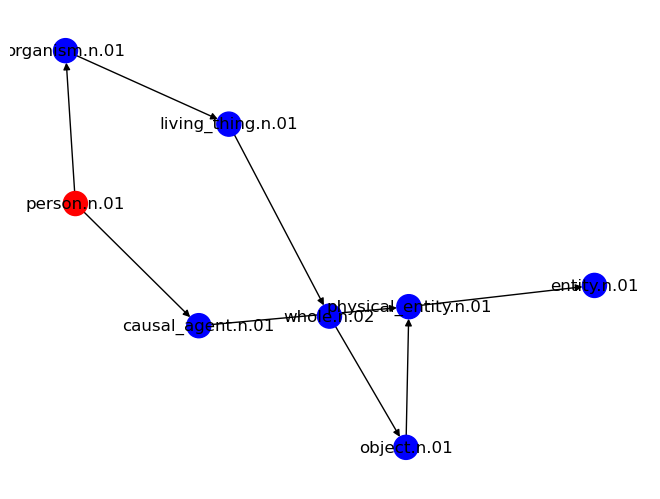

In [19]:
draw_closure_graph(wn.synset('person.n.01'))

Man beachte, dass in diesem Graphen die Kanten vom Unterbegriff/Hyponym auf den Oberbegriff/das Hyperonym zeigen.

Die Länge des kürzesten **gerichteten** Hyponymiepfades zwischen zwei beliebigen Synsets kann mit der Funktion `shortest_path_distance()` berechnet werden. Falls kein gerichteter Hyponymiepfad zwischen den Synsets besteht, werden die kürzesten Hyponymiepfade zum nächsten gemeinsamen Hypernym addiert: 

In [20]:
syns1 = wn.synset('dog.n.01')
syns2 = wn.synset('person.n.01')

print([syns1, syns2])
print("Kürzeste Hyponymiepfadlänge zwischen den Synsets: {}".format(syns1.shortest_path_distance(syns2)))

[Synset('dog.n.01'), Synset('person.n.01')]
Kürzeste Hyponymiepfadlänge zwischen den Synsets: 4


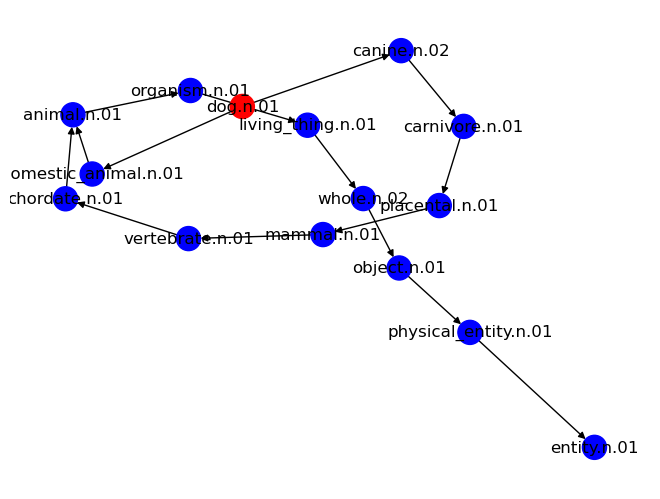

In [21]:
draw_closure_graph(wn.synset('dog.n.01'))

### Gemeinsame Hypernyme (nur Synsets)

NLTK stellt auch Funktionen zur Verfügung, um gemeinsem Hypernyme auszugeben:

- `common_hypernyms(synset)`: Liste der gemeinsamen Hypernyme
- `lowest_common_hypernyms(synset)`: Liste der nächsten gemeinsamen Hypernyme


In [22]:
syns1 = wn.synset('bank.n.01')
syns2 = wn.synset('sea.n.01')

print([syns1, syns2])
print("Gemeinsame Hypernyme:              {}".format(syns1.common_hypernyms(syns2)))
print("Die nächsten gemeinsame Hypernyme: {}".format(syns1.lowest_common_hypernyms(syns2)))

[Synset('bank.n.01'), Synset('sea.n.01')]
Gemeinsame Hypernyme:              [Synset('entity.n.01'), Synset('physical_entity.n.01')]
Die nächsten gemeinsame Hypernyme: [Synset('physical_entity.n.01')]


## <span style="color:red">Aufgaben II</span>

<span style="color:red">A2:</span> Schreiben Sie die Funktionen `common_hyponyms(synset1,synset2)` und `highest_common_hyponyms(synset1,synset2)`, die für zwei Synsets alle gemeinsamen (auch indirekten) Hyponyme bzw. die "höchsten"/allgemeinsten gemeinsamen Hyponyme ausgeben!

**Tip:** Verwenden Sie `shortest_path_distance()` oder `min_depth()` und die Synset-Funktion [`closure()`](https://www.nltk.org/api/nltk.corpus.reader.wordnet.html?highlight=closure#nltk.corpus.reader.wordnet.Synset.closure).

In [23]:
def common_hyponyms(synset1, synset2):
    # alle direkten und indirekten Hyponyme ermitteln 
    hyponyms1 = set(synset1.closure(lambda s: s.hyponyms()))
    hyponyms2 = set(synset2.closure(lambda s: s.hyponyms()))

    # intersection beider sets von Hyponymen finden
    common_hyponyms = hyponyms1.intersection(hyponyms2)
    
    # die common Hyponyme als liste zuruckgeben
    return list(common_hyponyms)

def highest_common_hyponyms(synset1, synset2):
    # alle common Hyponyme (direkt und indirekt) erhalten
    common_hyponyms_list = common_hyponyms(synset1, synset2)
    
    # die häufigsten Hyponeme mit der lowest depth finden
    if common_hyponyms_list:
        # Hyponyme nach ihrer depth in heirarchy sortieren 
        sorted_common_hyponyms = sorted(common_hyponyms_list, key=lambda s: s.min_depth())
        
        # Die allgemeinsten Hyponyme sind diejenigen mit der lowest depth
        return [sorted_common_hyponyms[0]]    
    
    #return []  

In [24]:
# Tests für A2 (nicht verändern)

syns1 = wn.synset('causal_agent.n.01')
syns2 = wn.synset('organism.n.01')

print([syns1, syns2])
ch = common_hyponyms(syns1,syns2)
hch = highest_common_hyponyms(syns1,syns2)
print("Gemeinsame Hyponyme:              {}".format(len(ch)))
print("Die nächsten gemeinsame Hyponyme: {}".format(hch))
print("Distanzen zu {}: {}".format(syns1,[syns1.shortest_path_distance(syns) for syns in hch]))
print("Distanzen zu {}: {}".format(syns2,[syns2.shortest_path_distance(syns) for syns in hch]))

[Synset('causal_agent.n.01'), Synset('organism.n.01')]
Gemeinsame Hyponyme:              7054
Die nächsten gemeinsame Hyponyme: [Synset('person.n.01')]
Distanzen zu Synset('causal_agent.n.01'): [1]
Distanzen zu Synset('organism.n.01'): [1]


Wir stellen fest, dass die meisten Synsets in WordNet (anders als `causal_agent.n.01` und `organism.n.01`) entweder keine gemeinsamen Hyponyme haben oder in einer direkten oder indirekten Hyponymierelation zueinander stehen. 

Es könnte also hilfreich sein, wenn man eine Funktion zur Hand hätte, die für ein Synset eine Liste von "unabhängigen Co-Hypernymen" (z.B. `causal_agent.n.01` bei `organism.n.01` und umgekehrt) ausgibt, für die jeweils gemeinsame Hyponyme in WordNet existieren, mit denen aber das Synset **nicht** in einer (transitiven) Hyponymierelation steht ... 

<span style="color:red">A3:</span> Schreiben Sie eine solche Funktionen `co_hyperonyms(synset)`, die für ein Synset alle Synsets ausgibt, mit denen gemeinsame, aber nicht unbedingt unmittelbare Hyponyme existieren, wobei zwischen diesen Synsets **keine** (transitive) Hyponymiebeziehung bestehen darf!

In [25]:
def co_hyperonyms(synset):
    out = []

    # Lösung A3
    # alle Hyponyme sammeln
    hyponyms_of_synset = set(synset.closure(lambda s: s.hyponyms()))
    
    # alle hypernyms sammeln 
    hypernyms_of_synset = set(synset.closure(lambda s: s.hypernyms()))
    
    # alle Synsets in WordNet mit demselben POS-Tag loopen
    for candidate in wn.all_synsets(synset.pos()):
        if candidate == synset:
            continue  
        
        # common Hyponyme zwischen Kandidat und dem original Synset finden
        candidate_hyponyms = set(candidate.closure(lambda s: s.hyponyms()))
        common_hyponyms = hyponyms_of_synset.intersection(candidate_hyponyms)
        
        # der Kandidat kein Hypernym oder Hyponym des original Synsets sicherstellen
        if common_hyponyms and not (
            candidate in hypernyms_of_synset or synset in candidate.closure(lambda s: s.hyponyms())
        ):
            out.append(candidate)

    return out

In [26]:
# Tests für A3 (nicht verändern)

testsyns = [wn.synset('organism.n.01'), wn.synset('bank.n.01'), wn.synset('carnivore.n.01')]

for i in testsyns :
    print("Co-Hypernyme von {}: Anzahl: {} \n {} \n".format(i,len(co_hyperonyms(i)),co_hyperonyms(i)))

Co-Hypernyme von Synset('organism.n.01'): Anzahl: 3551 
 [Synset('abstraction.n.06'), Synset('cell.n.02'), Synset('causal_agent.n.01'), Synset('person.n.01'), Synset('animal.n.01'), Synset('plant.n.02'), Synset('artifact.n.01'), Synset('psychological_feature.n.01'), Synset('cognition.n.01'), Synset('attribute.n.02'), Synset('state.n.02'), Synset('group.n.01'), Synset('relation.n.01'), Synset('communication.n.02'), Synset('pest.n.04'), Synset('scavenger.n.03'), Synset('bottom-feeder.n.02'), Synset('work_animal.n.01'), Synset('beast_of_burden.n.01'), Synset('pack_animal.n.01'), Synset('domestic_animal.n.01'), Synset('marine_animal.n.01'), Synset('female.n.01'), Synset('male.n.01'), Synset('young.n.01'), Synset('young_mammal.n.01'), Synset('pup.n.01'), Synset('cub.n.03'), Synset('microorganism.n.01'), Synset('anaerobe.n.01'), Synset('hybrid.n.03'), Synset('virus.n.01'), Synset('arbovirus.n.01'), Synset('adenovirus.n.01'), Synset('arenavirus.n.01'), Synset('filovirus.n.01'), Synset('flaviv